Purpose of this notebook is to establish a first simple baseline 

We are tasked to perform a binary classification (Response 1: , Response 0: ) and return probabilities for the class.
At this point my understaning is that we are asked to return a float between 0 and 1 (and not a categorical classification).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

In [3]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [4]:
train_df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

Depending on the model, we should convert Gender, vehicle_age, vehicle_damage to numeric values -> especially age

In [5]:
from preprocessing import vehicle_age_to_int
subset_train_df = train_df.head(100).copy()
subset_train_df["Vehicle_Age_Years"] = vehicle_age_to_int(subset_train_df["Vehicle_Age"])
subset_train_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_Years
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0,1
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1,2
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0,1
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Male,24,1,8.0,1,< 1 Year,No,48244.0,152.0,262,0,0
96,96,Female,40,1,30.0,1,1-2 Year,No,2630.0,156.0,36,0,1
97,97,Male,32,1,50.0,0,1-2 Year,Yes,2630.0,156.0,135,0,1
98,98,Male,22,1,33.0,1,< 1 Year,No,39153.0,152.0,292,0,0


In [6]:
sample_response_df = pd.read_csv("../data/sample_submission.csv")
sample_response_df.head()

,id,Response
0,11504798,0.5
1,11504799,0.5
2,11504800,0.5
3,11504801,0.5
4,11504802,0.5


There's a ~ 8:1 bias for 0 response vs 1 response in the training data

In [7]:
train_df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [8]:
train_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.752398e+06,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,3.321149e+06,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.876199e+06,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,5.752398e+06,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,8.628598e+06,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.150480e+07,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


In [9]:
avg_response = train_df["Response"].mean()
avg_response_df = test_df[["id"]].copy()
avg_response_df["Response"] = avg_response
avg_response_df.to_csv("../data/submissions/baseline_submission.csv", index=False)
avg_response_df

,id,Response
0,11504798,0.122997
1,11504799,0.122997
2,11504800,0.122997
3,11504801,0.122997
4,11504802,0.122997
...,...,...
7669861,19174659,0.122997
7669862,19174660,0.122997
7669863,19174661,0.122997
7669864,19174662,0.122997


Submit Baseline:

![baseline_submission](../images/baseline_submission.png)

Why do the sample submission (all 0.5) and baseline_submission (all average), all score 0.5?

```
If all predictions from a model are identical (i.e., the same predicted score or class is assigned to every instance), the ROC curve will appear as a diagonal line because the model has no discrimination ability between the positive and negative classes. In this case, the model is essentially guessing at random. 
Here’s why this happens:

1. Identical Predictions and Varying Thresholds:
If all the predictions are the same (e.g., all predicted probabilities are 0.5 or all predictions are the same class), changing the threshold does not change the predicted classification results.
    This leads to no variation in the True Positive Rate (TPR) and False Positive Rate (FPR), regardless of the threshold.
```

Thanks chatGPT

Check score metric: [AUC-ROC](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

Compare EDA with the provided notebook: [Official Kaggle NB](https://www.kaggle.com/code/annantkumarsingh/health-insurance-cross-sell-prediction/notebook)

Next simplest binary classification baseline:

    logistic regression

In [15]:
# subsetted
from preprocessing import map_categorical_to_int
df_master = map_categorical_to_int(train_df)
df_master.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,0,21,1,35.0,0,1,0,65101.0,124.0,187,0
1,1,0,43,1,28.0,0,2,0,58911.0,26.0,288,1
2,2,1,25,1,14.0,1,0,1,38043.0,152.0,254,0
3,3,1,35,1,1.0,0,1,0,2630.0,156.0,76,0
4,4,1,36,1,15.0,1,1,1,31951.0,152.0,294,0


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y = df_master["Response"]
X = df_master.drop(columns=["Response"])

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

/home/adi/anaconda3/envs/insurance_cs/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8769278909672484


In [24]:
from sklearn.metrics import accuracy_score
predictions = model.predict(X_test)
print(accuracy_score(predictions, y_test), predictions.max())
# predicts all zero > need to resample / handle unbalanced dataset

0.8769278909672484 0


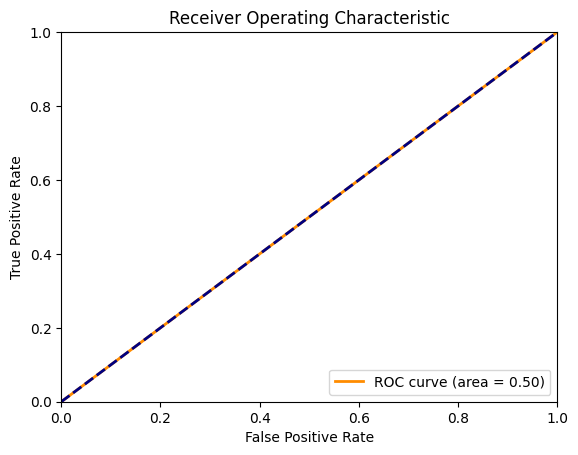

AUC-ROC score: 0.5


In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_true = y_test
y_scores = predictions

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC score: {roc_auc}")

In [ ]:
# apply model to test data for submission:
